In [1]:
import os
import obspy.clients.fdsn
import numpy as np
import pandas as pd
import obspy
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from datetime import datetime
import scipy
import warnings
warnings.filterwarnings("ignore")


import pylab as plt
import warnings
import os
import h5py
import matplotlib as mpl
%matplotlib inline

import sklearn
from sklearn import linear_model

import pandas as pd
import seaborn as sns

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, LSTM
from keras import losses
from keras.utils import to_categorical
from keras.layers import BatchNormalization
import keras.backend as K

from __future__ import print_function

from collections import defaultdict
import pickle
from PIL import Image

from six.moves import range

from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Embedding, Dropout, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import Progbar
import numpy as np

from numpy import zeros
from numpy import ones
from numpy import expand_dims
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Activation
from keras.layers import Concatenate
from keras.initializers import RandomNormal
from matplotlib import pyplot

np.random.seed(42)

2024-06-14 16:50:26.567253: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-14 16:50:28.766586: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
W = np.load('IRIS_dataset_waveforms_train.npy')
Y = np.load('IRIS_dataset_labels_train.npy')

In [3]:
W.shape, Y.shape

((1105, 3, 12000), (1105, 1))

In [4]:
W = W.reshape(-1,12000,3,1)
W.shape

(1105, 12000, 3, 1)

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Concatenate, Conv2D, BatchNormalization, Activation, Embedding
from tensorflow.keras.models import Model

def build_generator(latent_size):
    # label input
    in_label = Input(shape=(1,))
    li = Embedding(100, latent_size, embeddings_initializer='glorot_normal')(in_label)
    
    n_nodes = 100 * 3
    li = Dense(n_nodes)(li)
    li = Reshape((100, 3, 1))(li)        
    
    in_lat = Input(shape=(latent_size,))        
    n_nodes = 384 * 100 * 3
    gen = Dense(n_nodes)(in_lat)
    gen = Activation('relu')(gen)
    gen = Reshape((100, 3, 384))(gen)
    
    # merge image gen and label input
    merge = Concatenate()([gen, li])

    gen = Conv2D(32, (5, 5), activation='relu', padding='SAME')(merge)
    gen = BatchNormalization()(gen)
    gen = tf.keras.layers.UpSampling2D((2, 1))(gen)
    gen = Conv2D(64, (5, 5), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = Conv2D(128, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = Conv2D(256, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = Conv2D(128, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = tf.keras.layers.UpSampling2D((2, 1))(gen)
    gen = Conv2D(64, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = tf.keras.layers.UpSampling2D((2, 1))(gen)
    gen = Conv2D(64, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = tf.keras.layers.UpSampling2D((2, 1))(gen)
    gen = Conv2D(1, (3, 3), activation='tanh', padding='SAME')(gen)
    out_layer = BatchNormalization()(gen)        
    
    # define model
    model = Model([in_lat, in_label], out_layer)
    print("------------------Generator Model--------------------")
    print(model.summary())
    return model

# Call the function to build the generator and print the summary
latent_size = 100
build_generator(latent_size)

------------------Generator Model--------------------


Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_69      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_68      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_65 (Dense)    │ (None, 120000)    │ 12,120,000 │ input_layer_69[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_16        │ (None, 1, 100)    │     10,000 │ input_layer_68[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 120000)    │          0 │ dense_65[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 1, 300)    │     30,300 │ embedding_16[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_38          │ (None, 100, 3,    │          0 │ activation_16[0]… │
│ (Reshape)           │ 400)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_37          │ (None, 100, 3, 1) │          0 │ dense_64[0][0]    │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_16      │ (None, 100, 3,    │          0 │ reshape_38[0][0], │
│ (Concatenate)       │ 401)              │            │ reshape_37[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_222 (Conv2D) │ (None, 100, 3,    │    320,832 │ concatenate_16[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 3,    │        128 │ conv2d_222[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_71    │ (None, 200, 3,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_223 (Conv2D) │ (None, 200, 3,    │     51,264 │ up_sampling2d_71… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 3,    │        256 │ conv2d_223[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_224 (Conv2D) │ (None, 200, 3,    │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 3,    │        512 │ conv2d_224[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_225 (Conv2D) │ (None, 200, 3,    │    295,168 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 13,310,705 (50.78 MB)

 Trainable params: 13,309,231 (50.77 MB)

 Non-trainable params: 1,474 (5.76 KB)

None


<Functional name=functional_57, built=True>

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Model

def build_discriminator():
    in_image = Input(shape=(12000, 3, 1))
    fe = Conv2D(32, (5, 5), padding='same', activation='relu')(in_image)
    fe = BatchNormalization()(fe)
    fe = Conv2D(64, (5, 5), padding='same', activation='relu')(fe)  # Apply to the previous layer's output
    fe = BatchNormalization()(fe)
    # fe = LeakyReLU(alpha=0.2)(fe)
    fe = Conv2D(128, (3, 3), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    # fe = LeakyReLU(alpha=0.2)(fe)
    fe = Conv2D(256, (3, 3), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    # fe = LeakyReLU(alpha=0.2)(fe)
    fe = Conv2D(128, (3, 3), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    fe = Conv2D(64, (3, 3), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    # fe = LeakyReLU(alpha=0.2)(fe)
    # fe = Dropout(0.5)(fe)
    fe = Flatten()(fe)
    # real/fake output
    out1 = Dense(1, activation='sigmoid')(fe)
    # class label output
    out2 = Dense(2, activation='softmax')(fe)
    # define model
    model = Model(in_image, [out1, out2])

    print("------------------Discriminator Model--------------------")
    print(model.summary())
    return model

# Call the function to build the discriminator and print the summary
build_discriminator()


------------------Discriminator Model--------------------


Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_37      │ (None, 12000, 3,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_132 (Conv2D) │ (None, 12000, 3,  │        832 │ input_layer_37[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        128 │ conv2d_132[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_133 (Conv2D) │ (None, 12000, 3,  │     51,264 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        256 │ conv2d_133[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_134 (Conv2D) │ (None, 12000, 3,  │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        512 │ conv2d_134[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_135 (Conv2D) │ (None, 12000, 3,  │    295,168 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │      1,024 │ conv2d_135[0][0]  │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_136 (Conv2D) │ (None, 12000, 3,  │    295,040 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        512 │ conv2d_136[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_137 (Conv2D) │ (None, 12000, 3,  │     73,792 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        256 │ conv2d_137[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 2304000)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 1)         │  2,304,001 │ flatten_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 2)         │  4,608,002 │ flatten_9[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,704,643 (29.39 MB)

 Trainable params: 7,703,299 (29.39 MB)

 Non-trainable params: 1,344 (5.25 KB)

None


<Functional name=functional_31, built=True>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Concatenate, Conv2D, BatchNormalization, Activation, Embedding, Flatten, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from collections import defaultdict
from tensorflow.keras.utils import Progbar
from tensorflow.keras.layers import MaxPooling2D

def build_generator(latent_size):
    in_label = Input(shape=(1,))
    li = Embedding(100, latent_size)(in_label)
    n_nodes = 100 * 3
    li = Dense(n_nodes)(li)
    li = Reshape((100, 3, 1))(li)

    in_lat = Input(shape=(latent_size,))
    n_nodes = 100 * 3 * 384
    gen = Dense(n_nodes)(in_lat)
    gen = Activation('relu')(gen)
    gen = Reshape((100, 3, 384))(gen)

    merge = Concatenate()([gen, li])

    gen = Conv2D(32, (5, 5), activation='relu', padding='SAME')(merge)
    gen = BatchNormalization()(gen)
    gen = UpSampling2D((2, 1))(gen)  # 200 x 3 x 32
    gen = Conv2D(64, (5, 5), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = UpSampling2D((2, 1))(gen)  # 400 x 3 x 64
    gen = Conv2D(128, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = UpSampling2D((2, 1))(gen)  # 800 x 3 x 128
    gen = Conv2D(256, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = UpSampling2D((2, 1))(gen)  # 1600 x 3 x 256
    gen = Conv2D(128, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = UpSampling2D((3, 1))(gen)  # 4800 x 3 x 128
    gen = Conv2D(64, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = UpSampling2D((5, 1))(gen)  # 12000 x 3 x 64 (approximation)
    gen = BatchNormalization()(gen)
    gen = MaxPooling2D(pool_size=(2, 1))(gen)  # Downsample by factor of 2
    gen = Conv2D(64, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = Conv2D(1, (3, 3), activation='tanh', padding='SAME')(gen)

    out_layer = Reshape((12000, 3, 1))(gen)

    model = Model([in_lat, in_label], out_layer)
    print("------------------Generator Model--------------------")
    print(model.summary())
    return model

def build_discriminator():
    in_image = Input(shape=(12000, 3, 1))
    fe = Conv2D(32, (5, 5), padding='same', activation='relu')(in_image)
    fe = BatchNormalization()(fe)
    fe = Conv2D(64, (5, 5), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    fe = Conv2D(128, (3, 3), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    fe = Conv2D(256, (3, 3), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    fe = Conv2D(128, (3, 3), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    fe = Conv2D(64, (3, 3), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    fe = Flatten()(fe)
    out1 = Dense(1, activation='sigmoid')(fe)
    out2 = Dense(2, activation='softmax')(fe)
    model = Model(in_image, [out1, out2])

    print("------------------Discriminator Model--------------------")
    print(model.summary())
    return model

if __name__ == '__main__':
    nb_epochs = 20
    batch_size = 32
    latent_size = 100
    n_classes = 2

    adam_lr = 0.0002
    adam_beta_1 = 0.5

    discriminator = build_discriminator()
    discriminator.compile(
        optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
        loss=['binary_crossentropy', 'sparse_categorical_crossentropy']
    )

    generator = build_generator(latent_size)
    generator.compile(optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
                      loss='binary_crossentropy')

    latent = Input(shape=(latent_size,))
    image_class = Input(shape=(1,), dtype='int32')

    fake = generator([latent, image_class])

    discriminator.trainable = False
    fake_output, aux = discriminator(fake)
    combined = Model([latent, image_class], [fake_output, aux])

    combined.compile(
        optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
        loss=['binary_crossentropy', 'sparse_categorical_crossentropy']
    )

    W = np.load('IRIS_dataset_waveforms_train.npy')
    Y = np.load('IRIS_dataset_labels_train.npy')

    X_train, y_train, X_test, y_test = W[:1085], Y[:1085], W[1085:], Y[1085:]

    nb_train, nb_test = X_train.shape[0], X_test.shape[0]

    train_history = defaultdict(list)
    test_history = defaultdict(list)

    for epoch in range(nb_epochs):
        print('Epoch {} of {}'.format(epoch + 1, nb_epochs))

        nb_batches = int(X_train.shape[0] / batch_size)
        progress_bar = Progbar(target=nb_batches)

        epoch_gen_loss = []
        epoch_disc_loss = []

        for index in range(nb_batches):
            progress_bar.update(index)
            noise = np.random.uniform(-1, 1, (batch_size, latent_size))
            image_batch = X_train[index * batch_size:(index + 1) * batch_size]
            label_batch = y_train[index * batch_size:(index + 1) * batch_size]
            sampled_labels = np.random.randint(0, 2, batch_size)
            sampled_labels_reshaped = sampled_labels.reshape((-1, 1))

            generated_images = generator.predict([noise, sampled_labels_reshaped], verbose=0)


            import numpy as np

            # Assuming image_batch is in 3 dimensions and needs to be reshaped
            # Example: image_batch.shape = (batch_size, 12000, 3)

            # Reshape image_batch to have 4 dimensions
            image_batch_reshaped = np.reshape(image_batch, (batch_size, 12000, 3, 1))

            # Sampled labels for conditional generation
            sampled_labels = np.random.randint(0, 2, batch_size)

            # Reshape sampled_labels to match the generator input shape
            sampled_labels_reshaped = sampled_labels.reshape((-1, 1))

            # Generate fake images from the generator
            generated_images = generator.predict([noise, sampled_labels_reshaped], verbose=0)

            # Concatenate real and generated images along the batch axis
            X = np.concatenate((image_batch_reshaped, generated_images))

            # Create labels for the discriminator
            y = np.array([1] * batch_size + [0] * batch_size)

            # Auxiliary labels for the discriminator
            aux_y = np.concatenate((label_batch, sampled_labels.reshape((-1, 1))), axis=0)

            
            disc_loss = discriminator.train_on_batch(X, [y, aux_y])
            epoch_disc_loss.append(disc_loss)
            print(f"Discriminator Loss: {disc_loss}")

            noise = np.random.uniform(-1, 1, (2 * batch_size, latent_size))
            sampled_labels = np.random.randint(0, 2, 2 * batch_size)
            trick = np.ones(2 * batch_size)

            gen_loss = combined.train_on_batch(
                [noise, sampled_labels.reshape((-1, 1))], [trick, sampled_labels])
            epoch_gen_loss.append(gen_loss)
            print(f"Generator Loss: {gen_loss}")

        print('\nTesting for epoch {}:'.format(epoch + 1))


------------------Discriminator Model--------------------


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 12000, 3,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 12000, 3,  │        832 │ input_layer_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        128 │ conv2d_28[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 12000, 3,  │     51,264 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        256 │ conv2d_29[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 12000, 3,  │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        512 │ conv2d_30[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 12000, 3,  │    295,168 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │      1,024 │ conv2d_31[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 12000, 3,  │    295,040 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        512 │ conv2d_32[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 12000, 3,  │     73,792 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        256 │ conv2d_33[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 2304000)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │  2,304,001 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 2)         │  4,608,002 │ flatten_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,704,643 (29.39 MB)

 Trainable params: 7,703,299 (29.39 MB)

 Non-trainable params: 1,344 (5.25 KB)

None
------------------Generator Model--------------------


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_11      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 115200)    │ 11,635,200 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 100)    │     10,000 │ input_layer_11[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 115200)    │          0 │ dense_11[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1, 300)    │     30,300 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_7 (Reshape) │ (None, 100, 3,    │          0 │ activation_2[0][… │
│                     │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_6 (Reshape) │ (None, 100, 3, 1) │          0 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 100, 3,    │          0 │ reshape_7[0][0],  │
│ (Concatenate)       │ 385)              │            │ reshape_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 100, 3,    │    308,032 │ concatenate_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 3,    │        128 │ conv2d_34[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_12    │ (None, 200, 3,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 200, 3,    │     51,264 │ up_sampling2d_12… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 3,    │        256 │ conv2d_35[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_13    │ (None, 400, 3,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 400, 3,    │     73,856 │ up_sampling2d_13… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 400, 3,    │        512 │ conv2d_36[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_14    │ (None, 800, 3,    │          0 │ batch_normalizat

 Total params: 12,813,357 (48.88 MB)

 Trainable params: 12,811,757 (48.87 MB)

 Non-trainable params: 1,600 (6.25 KB)

None
Epoch 1 of 20
 0/33 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

/home/nemsake/myenv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Concatenate, Conv2D, BatchNormalization, Activation, Embedding, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from collections import defaultdict
from tensorflow.keras.utils import Progbar

# Define your build_discriminator and build_generator functions here

def build_discriminator():
    in_image = Input(shape=(12000, 3, 1))
    fe = Conv2D(32, (5, 5), padding='same', activation='relu')(in_image)
    fe = BatchNormalization()(fe)
    fe = Conv2D(64, (5, 5), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    fe = Conv2D(128, (3, 3), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    fe = Conv2D(256, (3, 3), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    fe = Conv2D(128, (3, 3), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    fe = Conv2D(64, (3, 3), padding='same', activation='relu')(fe)
    fe = BatchNormalization()(fe)
    fe = Flatten()(fe)
    out1 = Dense(1, activation='sigmoid')(fe)
    out2 = Dense(2, activation='softmax')(fe)
    model = Model(in_image, [out1, out2])

    print("------------------Discriminator Model--------------------")
    print(model.summary())
    return model

def build_generator(latent_size):
    in_label = Input(shape=(1,))
    li = Embedding(100, latent_size)(in_label)
    n_nodes = 100 * 3
    li = Dense(n_nodes)(li)
    li = Reshape((100, 3, 1))(li)

    in_lat = Input(shape=(latent_size,))
    n_nodes = 384 * 100 * 3
    gen = Dense(n_nodes)(in_lat)
    gen = Activation('relu')(gen)
    gen = Reshape((100, 3, 384))(gen)

    merge = Concatenate()([gen, li])

    gen = Conv2D(32, (5, 5), activation='relu', padding='SAME')(merge)
    gen = BatchNormalization()(gen)
    gen = tf.keras.layers.UpSampling2D((2, 1))(gen)
    gen = Conv2D(64, (5, 5), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = Conv2D(128, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = Conv2D(256, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = Conv2D(128, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = tf.keras.layers.UpSampling2D((2, 1))(gen)
    gen = Conv2D(64, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = tf.keras.layers.UpSampling2D((2, 1))(gen)
    gen = Conv2D(64, (3, 3), activation='relu', padding='SAME')(gen)
    gen = BatchNormalization()(gen)
    gen = tf.keras.layers.UpSampling2D((2, 1))(gen)
    gen = Conv2D(1, (3, 3), activation='tanh', padding='SAME')(gen)
    out_layer = BatchNormalization()(gen)

    model = Model([in_lat, in_label], out_layer)
    print("------------------Generator Model--------------------")
    print(model.summary())
    return model

if __name__ == '__main__':
    nb_epochs = 20
    batch_size = 32
    latent_size = 100
    n_classes = 2

    adam_lr = 0.0002
    adam_beta_1 = 0.5

    discriminator = build_discriminator()
    discriminator.compile(
        optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
        loss=['binary_crossentropy', 'sparse_categorical_crossentropy']
    )

    generator = build_generator(latent_size)
    generator.compile(optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
                      loss='binary_crossentropy')

    latent = Input(shape=(latent_size,))
    image_class = Input(shape=(1,), dtype='int32')

    fake = generator([latent, image_class])

    # Remove the explicit reshape and use a Keras Reshape layer instead
    fake_reshaped = Reshape((12000, 3, 1))(fake)

    discriminator.trainable = False
    fake_output, aux = discriminator(fake_reshaped)
    combined = Model([latent, image_class], [fake_output, aux])

    combined.compile(
        optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
        loss=['binary_crossentropy', 'sparse_categorical_crossentropy']
    )

    # Example data placeholders
    W = np.random.randn(1200, 12000, 3, 1)  # Replace with actual data loading
    Y = np.random.randint(0, 2, (1200, 1))  # Replace with actual data loading

    X_train, y_train, X_test, y_test = W[:1085], Y[:1085], W[1085:], Y[1085:]

    nb_train, nb_test = X_train.shape[0], X_test.shape[0]

    train_history = defaultdict(list)
    test_history = defaultdict(list)

    for epoch in range(nb_epochs):
        print('Epoch {} of {}'.format(epoch + 1, nb_epochs))

        nb_batches = int(X_train.shape[0] / batch_size)
        progress_bar = Progbar(target=nb_batches)

        epoch_gen_loss = []
        epoch_disc_loss = []

        for index in range(nb_batches):
            progress_bar.update(index)
            noise = np.random.uniform(-1, 1, (batch_size, latent_size))
            image_batch = X_train[index * batch_size:(index + 1) * batch_size]
            label_batch = y_train[index * batch_size:(index + 1) * batch_size]
            sampled_labels = np.random.randint(0, 2, batch_size)

            generated_images = generator.predict(
                [noise, sampled_labels.reshape((-1, 1))], verbose=0)

            X = np.concatenate((image_batch, generated_images))
            y = np.array([1] * batch_size + [0] * batch_size)
            aux_y = np.concatenate((label_batch, sampled_labels.reshape((-1, 1))), axis=0)

            disc_loss = discriminator.train_on_batch(X, [y, aux_y])
            epoch_disc_loss.append(disc_loss)
            print(f"Discriminator Loss: {disc_loss}")

            noise = np.random.uniform(-1, 1, (2 * batch_size, latent_size))
            sampled_labels = np.random.randint(0, 2, 2 * batch_size)
            trick = np.ones(2 * batch_size)

            gen_loss = combined.train_on_batch(
                [noise, sampled_labels.reshape((-1, 1))], [trick, sampled_labels])
            epoch_gen_loss.append(gen_loss)
            print(f"Generator Loss: {gen_loss}")

        print('\nTesting for epoch {}:'.format(epoch + 1))


------------------Discriminator Model--------------------


Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_63      │ (None, 12000, 3,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_208 (Conv2D) │ (None, 12000, 3,  │        832 │ input_layer_63[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        128 │ conv2d_208[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_209 (Conv2D) │ (None, 12000, 3,  │     51,264 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        256 │ conv2d_209[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_210 (Conv2D) │ (None, 12000, 3,  │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        512 │ conv2d_210[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_211 (Conv2D) │ (None, 12000, 3,  │    295,168 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │      1,024 │ conv2d_211[0][0]  │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_212 (Conv2D) │ (None, 12000, 3,  │    295,040 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        512 │ conv2d_212[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_213 (Conv2D) │ (None, 12000, 3,  │     73,792 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        256 │ conv2d_213[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_15          │ (None, 2304000)   │          0 │ batch_normalizat… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_60 (Dense)    │ (None, 1)         │  2,304,001 │ flatten_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_61 (Dense)    │ (None, 2)         │  4,608,002 │ flatten_15[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,704,643 (29.39 MB)

 Trainable params: 7,703,299 (29.39 MB)

 Non-trainable params: 1,344 (5.25 KB)

None
------------------Generator Model--------------------


Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_65      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_64      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_63 (Dense)    │ (None, 115200)    │ 11,635,200 │ input_layer_65[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 1, 100)    │     10,000 │ input_layer_64[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 115200)    │          0 │ dense_63[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_62 (Dense)    │ (None, 1, 300)    │     30,300 │ embedding_15[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_35          │ (None, 100, 3,    │          0 │ activation_15[0]… │
│ (Reshape)           │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_34          │ (None, 100, 3, 1) │          0 │ dense_62[0][0]    │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_15      │ (None, 100, 3,    │          0 │ reshape_35[0][0], │
│ (Concatenate)       │ 385)              │            │ reshape_34[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_214 (Conv2D) │ (None, 100, 3,    │    308,032 │ concatenate_15[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 3,    │        128 │ conv2d_214[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_67    │ (None, 200, 3,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_215 (Conv2D) │ (None, 200, 3,    │     51,264 │ up_sampling2d_67… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 3,    │        256 │ conv2d_215[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_216 (Conv2D) │ (None, 200, 3,    │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 3,    │        512 │ conv2d_216[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_217 (Conv2D) │ (None, 200, 3,    │    295,168 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 12,813,105 (48.88 MB)

 Trainable params: 12,811,631 (48.87 MB)

 Non-trainable params: 1,474 (5.76 KB)

None


ValueError: The total size of the tensor must be unchanged. Received: input_shape=(1600, 3, 1), target_shape=(12000, 3, 1)

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Concatenate, Conv2D, BatchNormalization, Activation, Embedding, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from collections import defaultdict
from tensorflow.keras.utils import Progbar
from tensorflow.keras.layers import Layer

# Define your build_discriminator and build_generator functions here

if __name__ == '__main__':
    nb_epochs = 20
    batch_size = 32
    latent_size = 100
    n_classes = 2

    adam_lr = 0.0002
    adam_beta_1 = 0.5

    # Assuming build_discriminator and build_generator functions are defined
    # build the discriminator
    discriminator = build_discriminator()
    discriminator.compile(
        optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
        loss=['binary_crossentropy', 'sparse_categorical_crossentropy']
    )

    # build the generator
    generator = build_generator(latent_size)
    generator.compile(optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
                      loss='binary_crossentropy')

    latent = Input(shape=(latent_size,))
    image_class = Input(shape=(1,), dtype='int32')

    # get a fake image
    fake = generator([latent, image_class])

    class MyCustomLayer(Layer):
        def __init__(self, target_shape, **kwargs):
           self.target_shape = target_shape
           super(MyCustomLayer, self).__init__(**kwargs)

        def call(self, inputs):
           return tf.reshape(inputs, self.target_shape)
        
    fake_reshaped = MyCustomLayer(target_shape=(12000, 3, 1))(fake)

    # we only want to be able to train generation for the combined model
    discriminator.trainable = False
    fake, aux = discriminator(fake_reshaped)
    combined = Model([latent, image_class], [fake, aux])

    combined.compile(
        optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
        loss=['binary_crossentropy', 'sparse_categorical_crossentropy']
    )

    # Assuming W and Y are your datasets and are already defined
    # Replace with actual data loading code if needed
    W = np.random.randn(1200, 12000, 3, 1)  # Example placeholder
    Y = np.random.randint(0, 2, (1200, 1))  # Example placeholder

    X_train, y_train, X_test, y_test = W[:1085], Y[:1085], W[1085:], Y[1085:]

    nb_train, nb_test = X_train.shape[0], X_test.shape[0]

    train_history = defaultdict(list)
    test_history = defaultdict(list)

    for epoch in range(nb_epochs):
        print('Epoch {} of {}'.format(epoch + 1, nb_epochs))

        nb_batches = int(X_train.shape[0] / batch_size)
        progress_bar = Progbar(target=nb_batches)

        epoch_gen_loss = []
        epoch_disc_loss = []

        for index in range(nb_batches):
            progress_bar.update(index)
            # generate a new batch of noise
            noise = np.random.uniform(-1, 1, (batch_size, latent_size))

            # get a batch of real images
            image_batch = X_train[index * batch_size:(index + 1) * batch_size]
            label_batch = y_train[index * batch_size:(index + 1) * batch_size]

            # sample some labels from p_c
            sampled_labels = np.random.randint(0, 2, batch_size)

            # generate a batch of fake images
            generated_images = generator.predict(
                [noise, sampled_labels.reshape((-1, 1))], verbose=0)

            X = np.concatenate((image_batch, generated_images))
            y = np.array([1] * batch_size + [0] * batch_size)
            aux_y = np.concatenate((label_batch, sampled_labels.reshape((-1, 1))), axis=0)

            # see if the discriminator can figure itself out...
            disc_loss = discriminator.train_on_batch(X, [y, aux_y])
            epoch_disc_loss.append(disc_loss)
            print(f"Discriminator Loss: {disc_loss}")

            # make new noise
            noise = np.random.uniform(-1, 1, (2 * batch_size, latent_size))
            sampled_labels = np.random.randint(0, 2, 2 * batch_size)

            # trick the discriminator
            trick = np.ones(2 * batch_size)

            gen_loss = combined.train_on_batch(
                [noise, sampled_labels.reshape((-1, 1))], [trick, sampled_labels])
            epoch_gen_loss.append(gen_loss)
            print(f"Generator Loss: {gen_loss}")

        print('\nTesting for epoch {}:'.format(epoch + 1))


------------------Discriminator Model--------------------


Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_58      │ (None, 12000, 3,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_194 (Conv2D) │ (None, 12000, 3,  │        832 │ input_layer_58[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        128 │ conv2d_194[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_195 (Conv2D) │ (None, 12000, 3,  │     51,264 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        256 │ conv2d_195[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_196 (Conv2D) │ (None, 12000, 3,  │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        512 │ conv2d_196[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_197 (Conv2D) │ (None, 12000, 3,  │    295,168 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │      1,024 │ conv2d_197[0][0]  │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_198 (Conv2D) │ (None, 12000, 3,  │    295,040 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        512 │ conv2d_198[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_199 (Conv2D) │ (None, 12000, 3,  │     73,792 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        256 │ conv2d_199[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_14          │ (None, 2304000)   │          0 │ batch_normalizat… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_56 (Dense)    │ (None, 1)         │  2,304,001 │ flatten_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_57 (Dense)    │ (None, 2)         │  4,608,002 │ flatten_14[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,704,643 (29.39 MB)

 Trainable params: 7,703,299 (29.39 MB)

 Non-trainable params: 1,344 (5.25 KB)

None
------------------Generator Model--------------------


Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_60      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_59      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_59 (Dense)    │ (None, 115200)    │ 11,635,200 │ input_layer_60[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 1, 100)    │     10,000 │ input_layer_59[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 115200)    │          0 │ dense_59[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_58 (Dense)    │ (None, 1, 300)    │     30,300 │ embedding_14[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_33          │ (None, 100, 3,    │          0 │ activation_14[0]… │
│ (Reshape)           │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_32          │ (None, 100, 3, 1) │          0 │ dense_58[0][0]    │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_14      │ (None, 100, 3,    │          0 │ reshape_33[0][0], │
│ (Concatenate)       │ 385)              │            │ reshape_32[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_200 (Conv2D) │ (None, 100, 3,    │    308,032 │ concatenate_14[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 3,    │        128 │ conv2d_200[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_63    │ (None, 200, 3,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_201 (Conv2D) │ (None, 200, 3,    │     51,264 │ up_sampling2d_63… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 3,    │        256 │ conv2d_201[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_202 (Conv2D) │ (None, 200, 3,    │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 3,    │        512 │ conv2d_202[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_203 (Conv2D) │ (None, 200, 3,    │    295,168 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 12,813,105 (48.88 MB)

 Trainable params: 12,811,631 (48.87 MB)

 Non-trainable params: 1,474 (5.76 KB)

None


RuntimeError: Exception encountered when calling MyCustomLayer.call().

[1mCould not automatically infer the output shape / dtype of 'my_custom_layer_1' (of type MyCustomLayer). Either the `MyCustomLayer.call()` method is incorrect, or you need to implement the `MyCustomLayer.compute_output_spec() / compute_output_shape()` method. Error encountered:

Dimension size must be evenly divisible by 4800 but is 36000 for '{{node Reshape}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32](Placeholder, Reshape/shape)' with input shapes: [?,1600,3,1], [3] and with input tensors computed as partial shapes: input[1] = [12000,3,1].[0m

Arguments received by MyCustomLayer.call():
  • args=('<KerasTensor shape=(None, 1600, 3, 1), dtype=float32, sparse=False, name=keras_tensor_700>',)
  • kwargs=<class 'inspect._empty'>

In [12]:
if __name__ == '__main__':

    nb_epochs = 20
    batch_size = 32
    latent_size = 100
    n_classes = 2

    adam_lr = 0.0002
    adam_beta_1 = 0.5

    # build the discriminator
    discriminator = build_discriminator()
    discriminator.compile(
        optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
        loss=['binary_crossentropy', 'sparse_categorical_crossentropy']
    )

    # build the generator
    generator = build_generator(latent_size)
    generator.compile(optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
                      loss='binary_crossentropy')

    latent = Input(shape=(latent_size, ))
    image_class = Input(shape=(1,), dtype='int32')

    # get a fake image
    fake = generator([latent, image_class])

    fake_reshaped = tf.reshape(fake, (-1, 12000, 3, 1))

    # we only want to be able to train generation for the combined model
    discriminator.trainable = False
    fake, aux = discriminator(fake)
    combined = Model([latent, image_class], [fake, aux])

    combined.compile(
        optimizer=Adam(lr=adam_lr, beta_1=adam_beta_1),
        loss=['binary_crossentropy', 'sparse_categorical_crossentropy']
    )

    X_train, y_train,X_test, y_test = W[:1085],Y[:1085],W[1085:],Y[1085:]

    nb_train, nb_test = X_train.shape[0], X_test.shape[0]

    train_history = defaultdict(list)
    test_history = defaultdict(list)

    for epoch in range(nb_epochs):
        print('Epoch {} of {}'.format(epoch + 1, nb_epochs))

        nb_batches = int(X_train.shape[0] / batch_size)
        progress_bar = Progbar(target=nb_batches)

        epoch_gen_loss = []
        epoch_disc_loss = []

        for index in range(nb_batches):
            progress_bar.update(index)
            # generate a new batch of noise
            noise = np.random.uniform(-1, 1, (batch_size, latent_size))

            # get a batch of real images
            image_batch = X_train[index * batch_size:(index + 1) * batch_size]
            label_batch = y_train[index * batch_size:(index + 1) * batch_size]

            # sample some labels from p_c
            sampled_labels = np.random.randint(0, 2, batch_size)

            # generate a batch of fake images, using the generated labels as a
            # conditioner. We reshape the sampled labels to be
            # (batch_size, 1) so that we can feed them into the embedding
            # layer as a length one sequence
            generated_images = generator.predict(
                [noise, sampled_labels.reshape((-1, 1))], verbose=0)

            X = np.concatenate((image_batch, generated_images))
            y = np.array([1] * batch_size + [0] * batch_size)
            aux_y = np.concatenate((label_batch, sampled_labels.reshape((-1, 1))), axis=0)

            # see if the discriminator can figure itself out...
            epoch_disc_loss.append(discriminator.train_on_batch(X, [y, aux_y]))

            # make new noise. we generate 2 * batch size here such that we have
            # the generator optimize over an identical number of images as the
            # discriminator
            noise = np.random.uniform(-1, 1, (2 * batch_size, latent_size))
            sampled_labels = np.random.randint(0, 2, 2 * batch_size)

            # we want to train the genrator to trick the discriminator
            # For the generator, we want all the {fake, not-fake} labels to say
            # not-fake
            trick = np.ones(2 * batch_size)

            epoch_gen_loss.append(combined.train_on_batch(
                [noise, sampled_labels.reshape((-1, 1))], [trick, sampled_labels]))

        print('\nTesting for epoch {}:'.format(epoch + 1))

        # evaluate the testing loss here

        # generate a new batch of noise
        noise = np.random.uniform(-1, 1, (nb_test, latent_size))

        # sample some labels from p_c and generate images from them
        sampled_labels = np.random.randint(0, 2, nb_test)
        generated_images = generator.predict(
            [noise, sampled_labels.reshape((-1, 1))], verbose=False)

        X = np.concatenate((X_test, generated_images))
        y = np.array([1] * nb_test + [0] * nb_test)
        aux_y = np.concatenate((y_test, sampled_labels.reshape((-1, 1))), axis=0)

        # see if the discriminator can figure itself out...
        discriminator_test_loss = discriminator.evaluate(
            X, [y, aux_y], verbose=False)

        discriminator_train_loss = np.mean(np.array(epoch_disc_loss), axis=0)

        # make new noise
        noise = np.random.uniform(-1, 1, (2 * nb_test, latent_size))
        sampled_labels = np.random.randint(0, 2, 2 * nb_test)

        trick = np.ones(2 * nb_test)

        generator_test_loss = combined.evaluate(
            [noise, sampled_labels.reshape((-1, 1))],
            [trick, sampled_labels], verbose=False)

        generator_train_loss = np.mean(np.array(epoch_gen_loss), axis=0)

        # generate an epoch report on performance
        train_history['generator'].append(generator_train_loss)
        train_history['discriminator'].append(discriminator_train_loss)

        test_history['generator'].append(generator_test_loss)
        test_history['discriminator'].append(discriminator_test_loss)

        print('{0:<22s} | {1:4s} | {2:15s} | {3:5s}'.format(
            'component', *discriminator.metrics_names))
        print('-' * 65)

        ROW_FMT = '{0:<22s} | {1:<4.2f} | {2:<15.2f} | {3:<5.2f}'
        print(ROW_FMT.format('generator (train)',
                             *train_history['generator'][-1]))
        print(ROW_FMT.format('generator (test)',
                             *test_history['generator'][-1]))
        print(ROW_FMT.format('discriminator (train)',
                             *train_history['discriminator'][-1]))
        print(ROW_FMT.format('discriminator (test)',
                             *test_history['discriminator'][-1]))

        # save weights every epoch
        generator.save_weights(
            'params_generator_epoch_{0:03d}.hdf5'.format(epoch), True)
        discriminator.save_weights(
            'params_discriminator_epoch_{0:03d}.hdf5'.format(epoch), True)

        # generate some waveforms to display
        # generate a new batch of noise
#         noise = np.random.uniform(-1, 1, (nb_test, latent_size))
#         sampled_labels = np.random.randint(0, 2, nb_test)
#         generated_images = generator.predict(
#             [noise, sampled_labels.reshape((-1, 1))], verbose=True)
#         generated_images = generated_images.reshape(nb_test,1600,3)
        
    #saving model weights and history training and testing performance of each epoch

    pickle.dump({'train': train_history, 'test': test_history},
                open('acgan-history.pkl', 'wb'))

------------------Discriminator Model--------------------


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 12000, 3,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 12000, 3,  │        832 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        128 │ conv2d_28[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 12000, 3,  │     51,264 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        256 │ conv2d_29[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 12000, 3,  │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        512 │ conv2d_30[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 12000, 3,  │    295,168 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │      1,024 │ conv2d_31[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 12000, 3,  │    295,040 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        512 │ conv2d_32[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 12000, 3,  │     73,792 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 12000, 3,  │        256 │ conv2d_33[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 2304000)   │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │  2,304,001 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 2)         │  4,608,002 │ flatten_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,704,643 (29.39 MB)

 Trainable params: 7,703,299 (29.39 MB)

 Non-trainable params: 1,344 (5.25 KB)

None
------------------Generator Model--------------------


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_9       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 115200)    │ 11,635,200 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 100)    │     10,000 │ input_layer_9[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 115200)    │          0 │ dense_11[0][0]    │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1, 300)    │     30,300 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_5 (Reshape) │ (None, 100, 3,    │          0 │ activation_2[0][… │
│                     │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, 100, 3, 1) │          0 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 100, 3,    │          0 │ reshape_5[0][0],  │
│ (Concatenate)       │ 385)              │            │ reshape_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 100, 3,    │    308,032 │ concatenate_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 3,    │        128 │ conv2d_34[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_8     │ (None, 200, 3,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 200, 3,    │     51,264 │ up_sampling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 3,    │        256 │ conv2d_35[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 200, 3,    │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 3,    │        512 │ conv2d_36[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 200, 3,    │    295,168 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 3,    │      1,024 │ conv2d_37[0][0] 

 Total params: 12,813,105 (48.88 MB)

 Trainable params: 12,811,631 (48.87 MB)

 Non-trainable params: 1,474 (5.76 KB)

None


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [43]:
best_epoch = 20
noise = np.random.uniform(-1, 1, (nb_test, latent_size))
sampled_labels = np.ones(nb_test)
generator.load_weights('params_generator_epoch_{0:03d}.hdf5'.format(best_epoch-1))
generated_images = generator.predict([noise, sampled_labels.reshape((-1, 1))],
                                     verbose=True)
generated_images = generated_images.reshape(nb_test,1600,3)

NameError: name 'nb_test' is not defined

In [8]:
generated_images.shape, W.shape

NameError: name 'generated_images' is not defined

In [9]:
plt.plot(generated_images[15,:,0])

NameError: name 'generated_images' is not defined

In [10]:
gen_train=[]
dis_train=[]
gen_test=[]
dis_test=[]

for i in range(len(train_history['generator'])):
    gen_train.append(train_history['generator'][i][0])
    dis_train.append(train_history['discriminator'][i][0])
    
for i in range(len(test_history['generator'])):
    gen_test.append(test_history['generator'][i][0])
    dis_test.append(test_history['discriminator'][i][0])

NameError: name 'train_history' is not defined

Text(0, 0.5, '$L_c$')

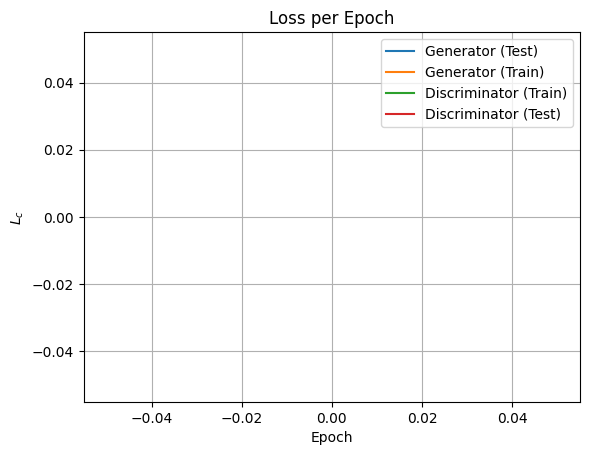

In [11]:
plt.plot(gen_test,label='Generator (Test)')
plt.plot(gen_train,label='Generator (Train)')
plt.plot(dis_train,label='Discriminator (Train)')
plt.plot(dis_test,label='Discriminator (Test)')
plt.grid()
plt.legend()
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel(r'$L_c$')

In [12]:
generated_images.shape, W.shape

NameError: name 'generated_images' is not defined

In [13]:
generated_images = generated_images.reshape(-1,1600,3,1)

NameError: name 'generated_images' is not defined

In [14]:
X = np.concatenate([W,generated_images], axis=0)
X.shape

NameError: name 'W' is not defined

In [15]:
Y.shape,sampled_labels.shape

NameError: name 'Y' is not defined

In [16]:
sampled_labels = sampled_labels.reshape(-1,1)
y = np.concatenate([Y,sampled_labels], axis=0)
y.shape

NameError: name 'sampled_labels' is not defined

In [17]:
seed = 42
np.random.seed(seed)
np.random.shuffle(X)
np.random.seed(seed)
np.random.shuffle(y)

NameError: name 'X' is not defined

In [18]:
W_test = np.load('IRIS_dataset_waveforms_test.npy')
Y_test = np.load('IRIS_dataset_labels_test.npy')
W_test.shape, Y_test.shape

FileNotFoundError: [Errno 2] No such file or directory: 'IRIS_dataset_waveforms_test.npy'

In [19]:
W_test = W_test.reshape(-1,1600,3,1)

NameError: name 'W_test' is not defined

In [20]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

def ResNet34(shape = (1600, 3, 1), classes = 2):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=5, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3,3,4]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(2):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(1, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [21]:
model1 = ResNet34()
model1.compile(optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
                      loss='binary_crossentropy',
             metrics=[tf.keras.metrics.Precision()])
model1.fit(X,y,epochs=1, batch_size=32, verbose=True)

NameError: name 'tf' is not defined

In [22]:
model2 = ResNet34()
model2.compile(optimizer=Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
                      loss='binary_crossentropy',
             metrics=[tf.keras.metrics.Precision()])
model2.fit(W,Y,epochs=1, batch_size=32, verbose=True)

NameError: name 'tf' is not defined